<a href="https://colab.research.google.com/github/Sara-Saraireh/House_Price_Prediction_in_Amman_Jordan/blob/main/House_Price_Prediction_in_Amman_Jordan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:

This notebook presents a machine learning project aimed at predicting apartment prices in Jubaiha, Amman, Jordan. The dataset contains various features such as the number of rooms, number of bathrooms, area, floor, and age of the apartment, which are used to predict the price.

##Dataset Description:
The dataset consists of 2403 observations and 6 columns:


*   **number of rooms:** This integer column represents the number of rooms in each apartment. It indicates the size of the living space and can significantly impact the overall price.
*   **number of bathrooms:** This integer column specifies the number of bathrooms in each house. This feature is crucial for convenience and comfort, and apartments with more bathrooms typically command higher prices.
* **area:** This integer column represents the area of the apartment in square meters. The size of the living space is a fundamental factor influencing the price, with larger apartments generally fetching higher prices.
* **floor:** This object column indicates the floor on which the apartment is located. It provides information about accessibility, views, and noise levels, which can affect the desirability and hence the price of the apartment. The floors are categorized as 'Ground Floor', 'First Floor', 'Second Floor', 'Third Floor', 'Fourth Floor', 'Fifth Floor', 'Semi-Ground Floor', 'Basement', and 'Last Floor With Roof'.
* **age:** This object column specifies the age of the apartment, categorized into ranges. Older apartments may require more maintenance and renovations, potentially impacting their value compared to newer properties. The age ranges are divided into '0 - 1 year', '1 - 5 years', '6 - 9 years', '10 - 19 years', and '20 - 40 years'.
* **Price:** This integer column represents the price of the apartment in Jordanian Dinars (JOD). This is the target variable that we aim to predict using the features provided.

##Objective:

The primary objective of this project is to build a machine learning model that can accurately predict apartment prices based on the given features. This prediction model can be valuable for both buyers and sellers in the real estate market, providing insights into the factors influencing apartment prices in Jubaiha.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from scipy import stats  # Import the stats module from SciPy
import joblib

# Set default figure size for matplotlib
plt.rcParams["figure.figsize"] = (20, 10)

# Set seaborn theme
sns.set_theme(style="darkgrid")


In [2]:
#df= pd.read_excel('/content/drive/MyDrive/الداتا/15jul-2023/cleaned data jubaiha 1-aug.xlsx')

In [3]:
df = pd.read_excel('Houses_in_Amman_Jordan.xlsx')


In [4]:
my_pal = {Price: "r" if Price == "versicolor" else "b" for Price in df.Price.unique()}


# 1. Data Exploration and Understanding

In [5]:
df.head()

,number of rooms,number of bathrooms,area,floor,age,Price
0,3,3,0,Ground Floor,0 - 1,125000
1,3,2,0,Ground Floor,1 - 5,0
2,2,2,0,Ground Floor,0 - 1,0
3,3,2,0,Ground Floor,6 - 9,45000
4,2,2,0,Third Floor,6 - 9,38000


In [6]:
df.shape

(2403, 6)

In [7]:
df.columns

Index(['number of rooms', 'number of bathrooms', 'area', 'floor', 'age',
       'Price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   number of rooms      2403 non-null   int64 
 1   number of bathrooms  2403 non-null   int64 
 2   area                 2403 non-null   int64 
 3   floor                2403 non-null   object
 4   age                  2403 non-null   object
 5   Price                2403 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 112.8+ KB


In [9]:
df['floor'].unique()

array(['Ground Floor', 'Third Floor', 'Fourth Floor', 'First Floor',
       'Basement', 'Second Floor', 'Fifth Floor', 'Semi-Ground Floor',
       'Last Floor With Roof'], dtype=object)

In [10]:
df['number of bathrooms'].unique()


array([3, 2, 1, 4, 5])

In [11]:
df['Price'].unique()

array([125000,      0,  45000,  38000,  83000,  17000,  16000,  22000,
        21000,  27000,  24700,  22500,  23000,  23500,  29000,  40000,
        35000,  36000,  79000,  39000,  25000,  65000,  47000,  29500,
        57000,  37000,  55000,  56000,  60000,  32000,  33000,  42000,
        49000,  58000,  59000,  61000,  50000,  80000,  56500, 160000,
        43000,  56800,  66000,  67000,  75000,  85000,  68000,  51000,
        46000,  34000,  54000, 188000,  30000,  52000,  36500,  63000,
        53000,  48000,  54300,  88000,  46500,  44000,  48500, 100000,
        70000,  95000,  64000,  78000,  69000,  82000,  42500,  62000,
        90000,  41000,  15000, 110000,  72000,  73000,  77000, 120000,
        93000,  76000,  74000,  81000, 115000, 103000, 105000, 107000,
        67500,  84000,  96000,  94000,  87000,  18000,  89000,  92000,
        98000, 106000, 112000,  86000, 108000, 109000, 124000, 129000,
        97000,  99000, 123000, 131000, 145000,  84500, 118000, 114000,
      

In [12]:
df['age'].unique()

array(['0 - 1', '1 - 5', '6 - 9', '10 - 19', '20 - 40'], dtype=object)

In [13]:
df['area'].unique()

array([   0,   20,   25,   26,   27,   30,   36,   38,   42,   50,   56,
         58,   60,   61,   62,   70,   71,   73,   74,   75,   77,   78,
         79,   80,   81,   82,   83,   84,   85,   87,   88,   90,   91,
         92,   93,   94,   95,   96,   97,   98,   99,  100,  101,  102,
        104,  105,  106,  108,  110,  111,  112,  113,  115,  116,  117,
        118,  119,  120,  121,  122,  123,  124,  125,  126,  127,  128,
        129,  130,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  143,  144,  145,  146,  147,  148,  149,  150,  152,
        155,  156,  157,  158,  160,  161,  162,  163,  164,  165,  166,
        167,  168,  169,  170,  171,  172,  173,  174,  175,  176,  177,
        178,  179,  180,  181,  182,  183,  184,  185,  186,  187,  188,
        189,  190,  191,  192,  193,  194,  195,  196,  197,  198,  200,
        201,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  215,  216,  217,  218,  220,  221,  2

# 1. Data Preprocessing:

## Data Cleaning and Imputation
This section details the process of cleaning and imputing missing values in our real estate dataset, particularly for the "Price" and "Area" features.

### Initial Exploration:

We identified a total of 6 missing values in the "Area" column and 829 missing values in the "Price" column.

### Multi-Step Imputation Strategy:

We implemented a multi-step approach to impute missing values, considering different property features for grouping:

1. **Removing Rows with Simultaneous Zero Values:** Before proceeding with imputation, we first removed rows where both the "Price" and "Area" values were zero.
2. **Imputation by Detailed Properties:** Next, we grouped the data by "number of rooms," "number of bathrooms," "age," and "floor." Missing values in "Price" and "Area" were imputed using the median price and area within each group.

### Results:

* After the initial cleaning step, the number of missing values in both "Area" and "Price" columns dropped to 0.
* The subsequent imputation step further ensured that all zero values were replaced with meaningful data.

### Discussion:

This multi-step approach ensures that our dataset is free from missing or zero values, enabling more robust analysis. However, it's essential to acknowledge that while we've successfully imputed missing values, this process may have introduced some biases. Further exploration into alternative imputation methods or additional data sources could enhance the accuracy of our analysis.

### Decision on Remaining Missing Values:

With no remaining missing values or zero values, we can proceed confidently with our analysis without the need for further imputation or removal of data points.



In [14]:
df.isnull().sum()

number of rooms        0
number of bathrooms    0
area                   0
floor                  0
age                    0
Price                  0
dtype: int64

In [15]:
# Calculate the count of zero values in the 'area' column
area_zero_count = (df['area'] == 0).sum()

# Calculate the count of zero values in the 'price' column
price_zero_count = (df['Price'] == 0).sum()

# Print the counts
print("Count of zero values in 'area' column:", area_zero_count)
print("Count of zero values in 'price' column:", price_zero_count)


Count of zero values in 'area' column: 6
Count of zero values in 'price' column: 829


In [16]:
#calculate the count of zero vlaues in both 'Price' and 'area' columns
len(df[(df['Price'] == 0) & (df['area'] == 0)])

2

In [17]:
# Remove rows with zero values in both 'price' and 'area' columns
df2 = df[~((df['Price'] == 0) & (df['area'] == 0))]


In [18]:
df2.shape

(2401, 6)

In [19]:
(df2['Price'] == 0).sum()

827

In [20]:
df3= df2.copy()
# Group by relevant properties ('number of rooms', 'number of bathrooms', 'age')
groups = df3.groupby(['number of rooms', 'number of bathrooms', 'age', 'floor'])

# Impute zero values with median based on the same properties
for group_name, group_data in groups:
    non_zero_prices = group_data[group_data['Price'] != 0]['Price']
    if not non_zero_prices.empty:
        median_price = non_zero_prices.median()
        df3.loc[(df3['number of rooms'] == group_name[0]) &
                (df3['number of bathrooms'] == group_name[1]) &
                (df3['age'] == group_name[2]) &
                (df3['floor'] == group_name[3]) &
                (df3['Price'] == 0), 'Price'] = median_price

    non_zero_areas = group_data[group_data['area'] != 0]['area']
    if not non_zero_areas.empty:
        median_area = non_zero_areas.median()
        df3.loc[(df3['number of rooms'] == group_name[0]) &
                (df3['number of bathrooms'] == group_name[1]) &
                (df3['age'] == group_name[2]) &
                (df3['floor'] == group_name[3]) &
                (df3['area'] == 0), 'area'] = median_area


# Calculate the count of zero values in the 'area' column
area_zero_count = (df3['area'] == 0).sum()
# Calculate the count of zero values in the 'price' column
price_zero_count = (df3['Price'] == 0).sum()
# Print the counts
print("Count of zero values in 'area' column:", area_zero_count)
print("Count of zero values in 'price' column:", price_zero_count)


Count of zero values in 'area' column: 0
Count of zero values in 'price' column: 34


In [21]:
# Drop remaining 34 rows with zero values in 'price'
df4 = df3[(df3['Price'] != 0)]
df4.shape


(2367, 6)

In [22]:
print("\nOriginal 'Price' statistics:")
print(df2['Price'].describe())

print("\nImputed 'Price' statistics:")
print(df4['Price'].describe())

print("\nOriginal 'area' statistics:")
print(df2['area'].describe())

print("\nImputed 'area' statistics:")
print(df4['area'].describe())


Original 'Price' statistics:
count      2401.000000
mean      56004.914619
std       50243.887116
min           0.000000
25%           0.000000
50%       59000.000000
75%       92000.000000
max      365000.000000
Name: Price, dtype: float64

Imputed 'Price' statistics:
count      2367.000000
mean      89556.316012
std       36621.731968
min       15000.000000
25%       66000.000000
50%       88000.000000
75%      100000.000000
max      365000.000000
Name: Price, dtype: float64

Original 'area' statistics:
count    2401.000000
mean      162.206997
std        57.915298
min         0.000000
25%       130.000000
50%       160.000000
75%       185.000000
max      1455.000000
Name: area, dtype: float64

Imputed 'area' statistics:
count    2367.000000
mean      162.355725
std        57.614227
min        20.000000
25%       130.000000
50%       160.000000
75%       185.000000
max      1455.000000
Name: area, dtype: float64


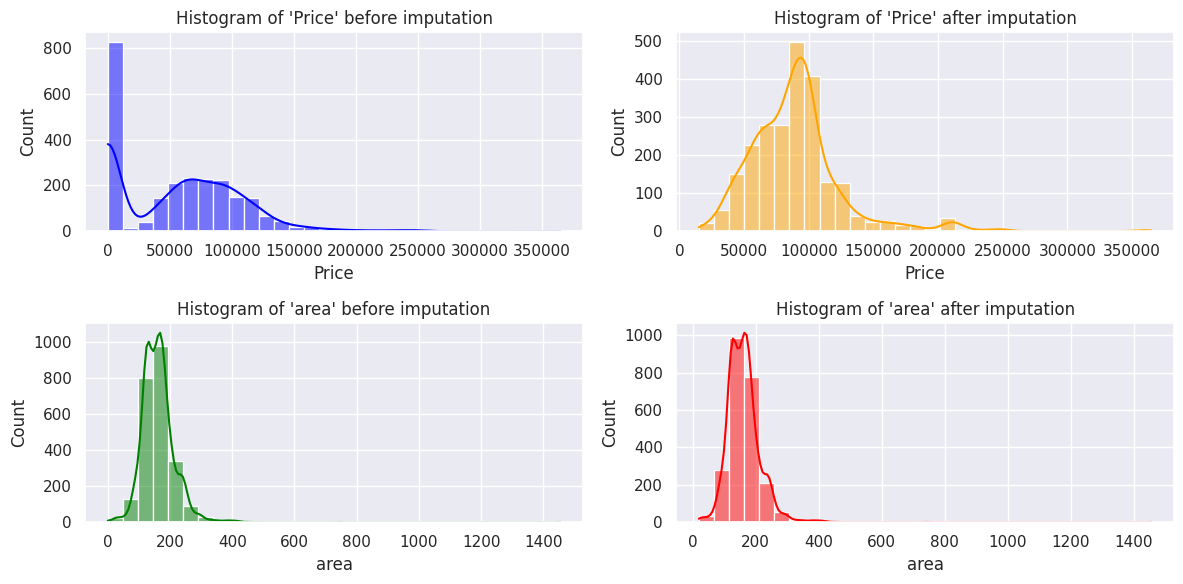

In [23]:
# Visual inspection
# Plot histograms of 'Price' and 'area' before and after imputation
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df2['Price'], bins=30, kde=True, color='blue')
plt.title("Histogram of 'Price' before imputation")

plt.subplot(2, 2, 2)
sns.histplot(df4['Price'], bins=30, kde=True, color='orange')
plt.title("Histogram of 'Price' after imputation")

plt.subplot(2, 2, 3)
sns.histplot(df2['area'], bins=30, kde=True, color='green')
plt.title("Histogram of 'area' before imputation")

plt.subplot(2, 2, 4)
sns.histplot(df4['area'], bins=30, kde=True, color='red')
plt.title("Histogram of 'area' after imputation")

plt.tight_layout()
plt.show()

##Outlier Handling Explanation:

Outliers, or extreme values, can significantly affect the statistical properties and results of data analysis. In real estate datasets, outliers in features such as 'area' and 'Price' can distort patterns and lead to biased analysis or predictions. Therefore, it's essential to identify and handle outliers appropriately.

* **Z-score Method:**
The Z-score method detected no outliers for the 'Price' variable, indicating that no data points were considered extreme based on their deviation from the mean.

* **Interquartile Range (IQR) Method:**
 - The IQR method detected 125 outliers for the 'Price' variable.
 - Outliers were identified based on the lower and upper bounds calculated using the first quartile (Q1) and third quartile (Q3).
 - These outliers represent data points that fall outside the range defined by 1.5 times the IQR below Q1 and above Q3.

* **Combination of Methods:**
By employing both the z-score and IQR methods, we aimed to ensure a comprehensive approach to outlier detection and removal. This combination allows for a more robust identification of outliers, considering both the distribution characteristics and statistical properties of the data. Removing outliers helps mitigate their influence on subsequent analysis, ensuring more reliable insights and predictions from the real estate dataset.

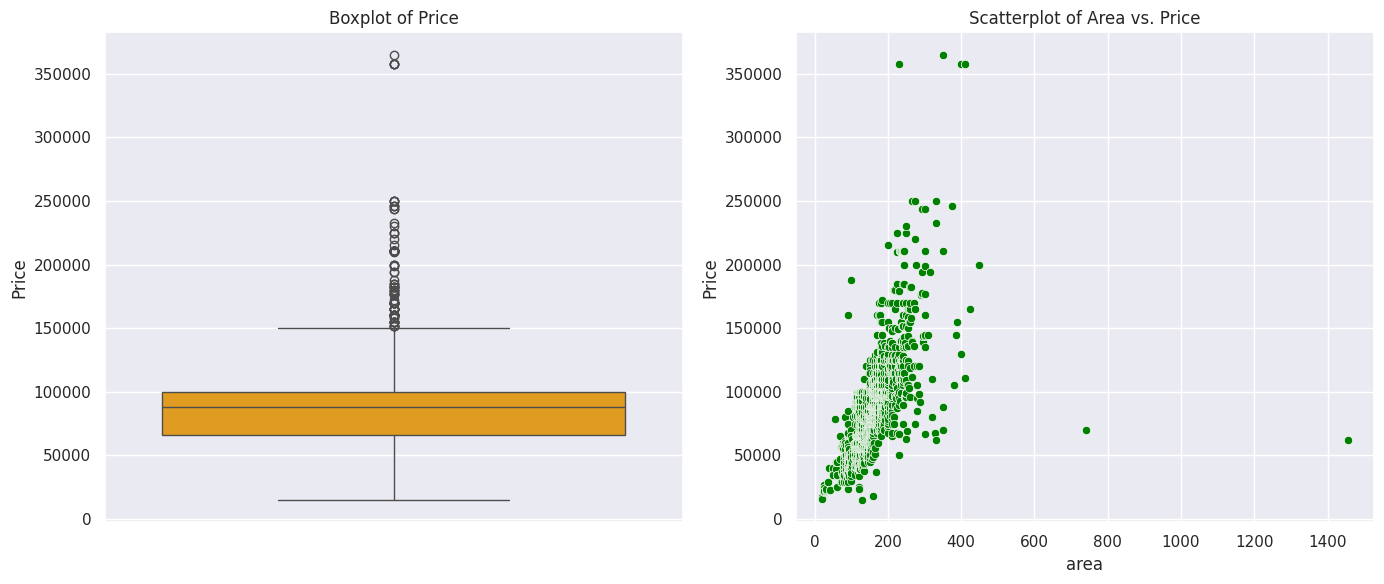

In [24]:
df5=df4.copy()

# Visualize outliers using box plots and scatter plots
plt.figure(figsize=(14, 6))

# Box plot for 'Price'
plt.subplot(1, 2, 1)
sns.boxplot(data=df4, y='Price', color='orange')
plt.title('Boxplot of Price')

# Scatter plot for 'Area' vs. 'Price'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df4, x='area', y='Price', color='green')
plt.title('Scatterplot of Area vs. Price')

plt.tight_layout()
plt.show()



In [25]:

df5= df4.copy()
# Detect outliers based on Z-score for 'Price'
z_scores_price = np.abs(stats.zscore(df5['Price']))
outlier_threshold = 3
outliers_price = df5[z_scores_price > outlier_threshold]

print("Number of outliers detected based on Z-score method (Price):", len(outliers_price))


# Detect outliers based on Z-score for 'area'
z_scores_area = np.abs(stats.zscore(df5['area']))
outlier_threshold = 3
outliers_area = df5[z_scores_area > outlier_threshold]

print("Number of outliers detected based on Z-score method (area):", len(outliers_area))




# Detect outliers based on IQR method for 'Area'
Q1_area = df5['area'].quantile(0.25)
Q3_area = df5['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area
iqr_outliers_area = df5[(df5['area'] < lower_bound_area) | (df5['area'] > upper_bound_area)]

print("Number of outliers detected based on IQR method (Area):", len(iqr_outliers_area))


Number of outliers detected based on Z-score method (Price): 60
Number of outliers detected based on Z-score method (area): 20
Number of outliers detected based on IQR method (Area): 82


In [26]:
#Handling using combined method:

# Make a copy of df5 and name it df6
df6 = df5.copy()

# Function to handle outliers using z-score method
def handle_outliers_zscore(df, column):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outliers = df[(z_scores > 3) | (z_scores < -3)]
    df.drop(outliers.index, inplace=True)
    return df

# Function to handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df.drop(outliers.index, inplace=True)
    return df

# Handling outliers in 'area' column using both z-score and IQR methods
df6 = handle_outliers_zscore(df6, 'area')
df6 = handle_outliers_iqr(df6, 'area')

# Handling outliers in 'Price' column using both z-score and IQR methods
df6 = handle_outliers_zscore(df6, 'Price')
df6 = handle_outliers_iqr(df6, 'Price')

# Print the shape of the DataFrame after handling outliers
print("Shape of DataFrame after handling outliers:", df6.shape)

Shape of DataFrame after handling outliers: (2188, 6)


### befor and after handing outliers


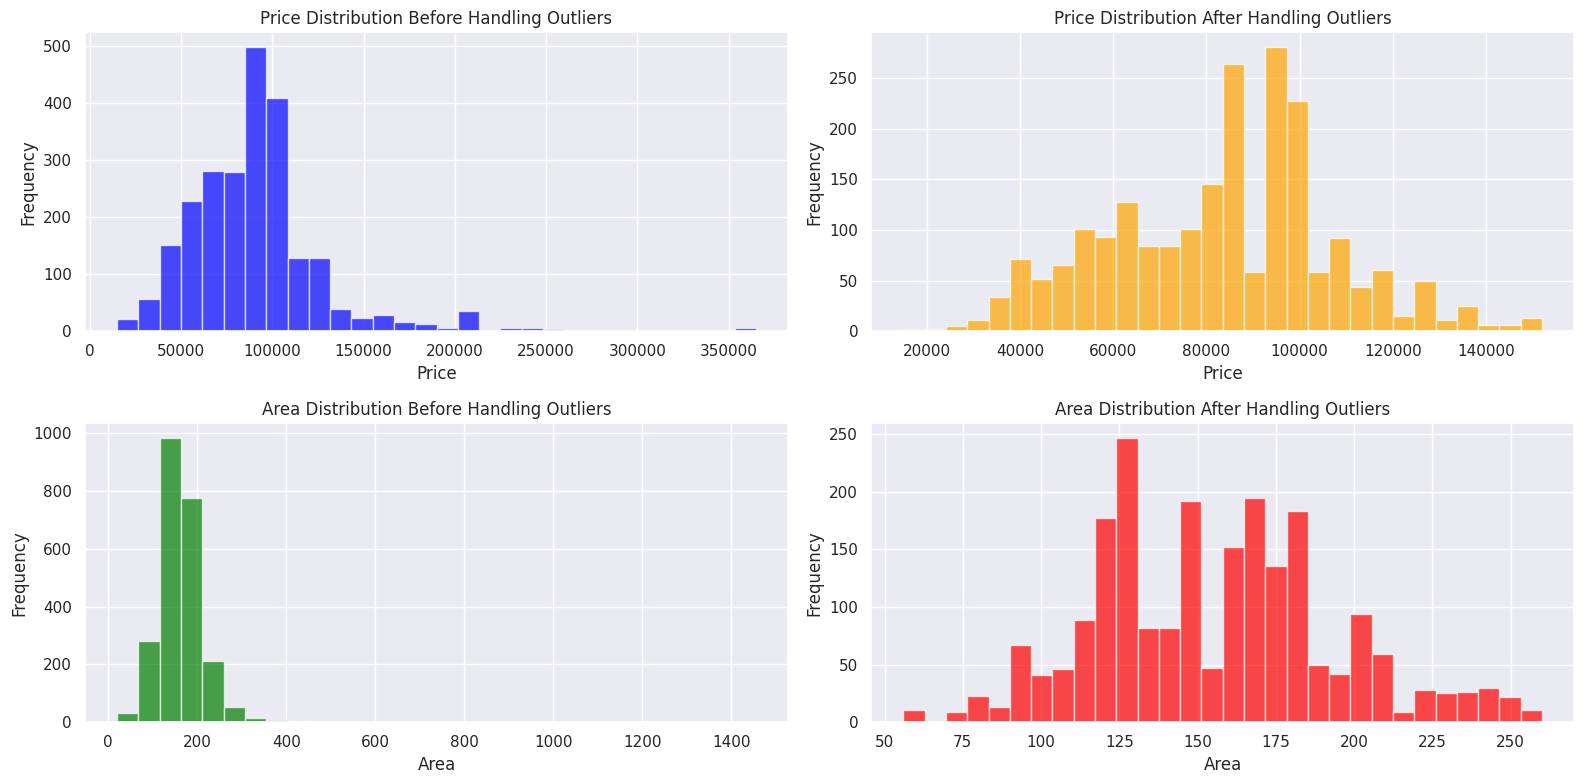

In [27]:

# Visualizing 'Price' before and after handling outliers
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.hist(df5['Price'], bins=30, color='blue', alpha=0.7)
plt.title('Price Distribution Before Handling Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df6['Price'], bins=30, color='orange', alpha=0.7)
plt.title('Price Distribution After Handling Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')


# Visualizing 'Area' before and after handling outliers
plt.subplot(2, 2, 3)
plt.hist(df5['area'], bins=30, color='green', alpha=0.7)
plt.title('Area Distribution Before Handling Outliers')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df6['area'], bins=30, color='red', alpha=0.7)
plt.title('Area Distribution After Handling Outliers')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


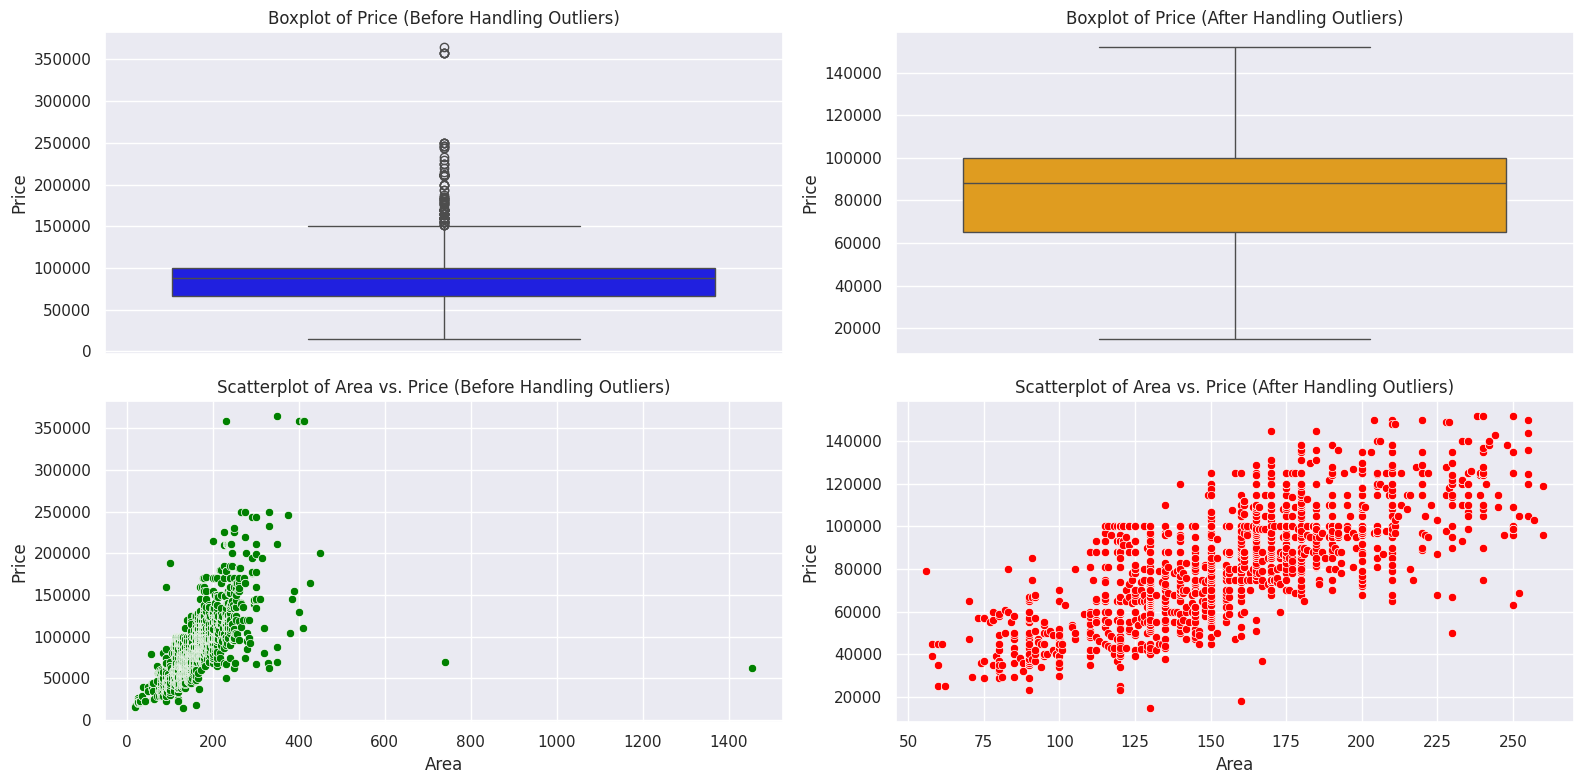

In [28]:


# Set up the figure and axes
plt.figure(figsize=(16, 8))

# Box plot for 'Price' before handling outliers
plt.subplot(2, 2, 1)
sns.boxplot(data=df5, y='Price', color='blue')
plt.title('Boxplot of Price (Before Handling Outliers)')
plt.ylabel('Price')


# Box plot for 'Price' after handling outliers
plt.subplot(2, 2, 2)
sns.boxplot(data=df6, y='Price', color='orange')
plt.title('Boxplot of Price (After Handling Outliers)')
plt.ylabel('Price')

# Scatter plot for 'Area' vs. 'Price' before handling outliers
plt.subplot(2, 2, 3)
sns.scatterplot(data=df5, x='area', y='Price', color='green')
plt.title('Scatterplot of Area vs. Price (Before Handling Outliers)')
plt.xlabel('Area')
plt.ylabel('Price')


# Scatter plot for 'Area' vs. 'Price' after handling outliers
plt.subplot(2, 2, 4)
sns.scatterplot(data=df6, x='area', y='Price', color='red')
plt.title('Scatterplot of Area vs. Price (After Handling Outliers)')
plt.xlabel('Area')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


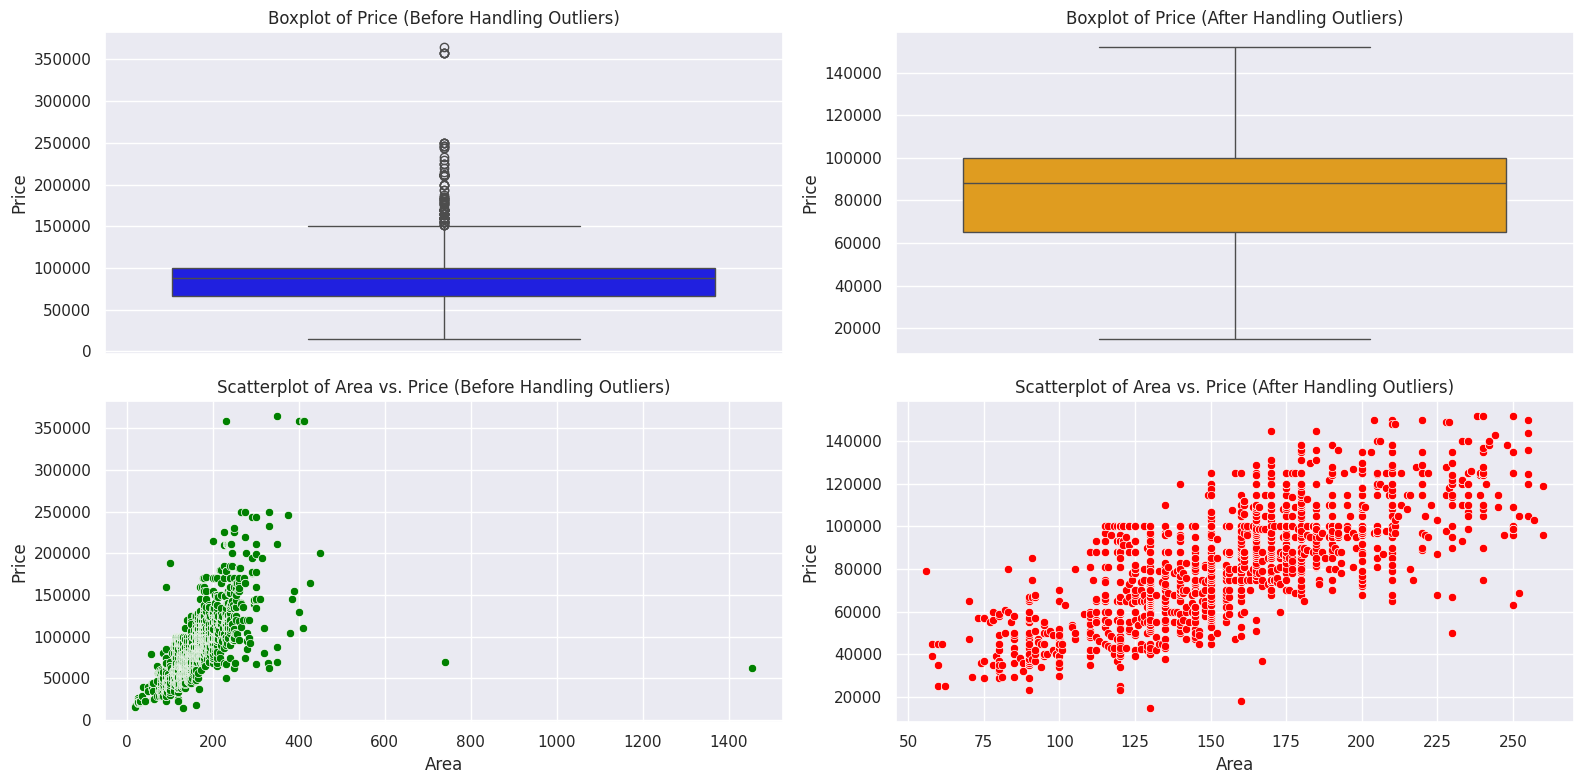

In [29]:

# Set up the figure and axes
plt.figure(figsize=(16, 8))

# Box plot for 'Price' before handling outliers
plt.subplot(2, 2, 1)
sns.boxplot(data=df5, y='Price', color='blue')
plt.title('Boxplot of Price (Before Handling Outliers)')
plt.ylabel('Price')


# Box plot for 'Price' after handling outliers
plt.subplot(2, 2, 2)
sns.boxplot(data=df6, y='Price', color='orange')
plt.title('Boxplot of Price (After Handling Outliers)')
plt.ylabel('Price')

# Scatter plot for 'Area' vs. 'Price' before handling outliers
plt.subplot(2, 2, 3)
sns.scatterplot(data=df5, x='area', y='Price', color='green')
plt.title('Scatterplot of Area vs. Price (Before Handling Outliers)')
plt.xlabel('Area')
plt.ylabel('Price')


# Scatter plot for 'Area' vs. 'Price' after handling outliers
plt.subplot(2, 2, 4)
sns.scatterplot(data=df6, x='area', y='Price', color='red')
plt.title('Scatterplot of Area vs. Price (After Handling Outliers)')
plt.xlabel('Area')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [30]:
df7= df6.copy()
df7.drop(columns='Price', axis=0, inplace=True)
df7.head()

,number of rooms,number of bathrooms,area,floor,age
0,3,3,165.0,Ground Floor,0 - 1
3,3,2,120.0,Ground Floor,6 - 9
4,2,2,100.0,Third Floor,6 - 9
5,3,3,165.0,Ground Floor,0 - 1
27,3,3,56.0,Ground Floor,1 - 5


#Feature engineering

Total Number of Rooms and Bathrooms:
Combining the total number of rooms and bathrooms into a single feature provides a more comprehensive view of the apartment's layout and amenities. This combined feature captures the overall size and functionality of the apartment, considering both living spaces and essential amenities like bathrooms. Including this feature enables the model to account for variations in apartment size and layout, which can influence pricing.

By incorporating this engineered feature, we aim to enhance the predictive power of our model by providing it with more informative and relevant input features.

In [31]:

df9=df7.copy()


# Define a custom transformer to map floor descriptions to numerical values
class FloorMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.floor_mapping = {'Ground Floor': 0, 'Semi-Ground Floor': -1, 'Basement': -2, 'First Floor': 1,
                              'Second Floor': 2, 'Third Floor': 3, 'Fourth Floor': 4, 'Fifth Floor': 5,
                              'Last Floor With Roof': 6}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X['floor'].map(self.floor_mapping).values.reshape(-1, 1)

# Define a custom transformer to calculate total rooms
class TotalRoomsCalculator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        total_rooms = X.iloc[:, 0] + X.iloc[:, 1]  # Access columns by position
        return total_rooms.values.reshape(-1, 1)

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('area_scaling', StandardScaler(), ['area']),
        ('age_encoding', OneHotEncoder(), ['age']),
        ('floor_mapping', FloorMapper(), ['floor']),
        ('total_rooms_calculation', TotalRoomsCalculator(), ['number of rooms', 'number of bathrooms'])
    ],
    remainder='drop'
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
])

# Fit and transform the data
df_processed = pipeline.fit_transform(df9)

# Define the list of age categories
age_categories = ['0 - 1','1 - 5', '6 - 9',  '10 - 19', '20 - 40']

# Create new column names for the encoded features
age_columns = ['age_' + category.replace(' ', '_') for category in age_categories]

# Convert the NumPy array to a DataFrame
df10 = pd.DataFrame(df_processed, columns=['area_scaled'] + age_columns + ['floor_numeric', 'total_rooms'])

#joblib.dump(pipeline, 'preprocessing_pipeline.joblib')

# Display the first few rows of the modified DataFrame
df10.head(10)


,area_scaled,age_0_-_1,age_1_-_5,age_6_-_9,age_10_-_19,age_20_-_40,floor_numeric,total_rooms
0,0.256502,1.0,0.0,0.0,0.0,0.0,0.0,6.0
1,-0.929132,0.0,0.0,0.0,0.0,1.0,0.0,5.0
2,-1.456080,0.0,0.0,0.0,0.0,1.0,3.0,4.0
3,0.256502,1.0,0.0,0.0,0.0,0.0,0.0,6.0
4,-2.615367,0.0,1.0,0.0,0.0,0.0,0.0,6.0
5,-2.562672,0.0,0.0,0.0,0.0,1.0,1.0,3.0
6,-2.562672,0.0,1.0,0.0,0.0,0.0,1.0,2.0
7,-2.509977,0.0,0.0,0.0,0.0,1.0,-2.0,3.0
8,-2.509977,0.0,0.0,1.0,0.0,0.0,3.0,3.0
9,-2.509977,0.0,0.0,1.0,0.0,0.0,3.0,3.0


Testing Preprocessing Pipeline

In [32]:
# Save the processed DataFrame to a CSV file
#df10.to_csv('/content/df10.csv', index=False)
#df9.to_csv('/content/df9.csv', index=False)

In [33]:
df6.columns

Index(['number of rooms', 'number of bathrooms', 'area', 'floor', 'age',
       'Price'],
      dtype='object')

# Model Selection

Model: RandomForestRegressor
Best Parameters:
max_depth: 10
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 200
Best Score (RMSE): 12038.721838865815
Train RMSE: 8616.595663690845
Test RMSE: 12093.254372951018
Train MAE: 6032.893033577493
Test MAE: 8442.083481124928
Train R^2: 0.8742154875122037
Test R^2: 0.7429221207259551


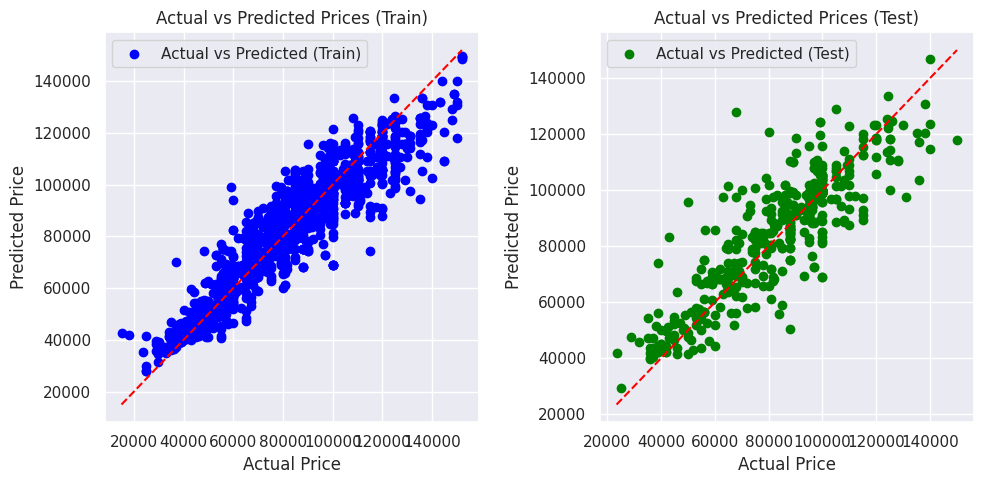



Model: GradientBoostingRegressor
Best Parameters:
learning_rate: 0.1
max_depth: 7
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 50
Best Score (RMSE): 12152.303686236386
Train RMSE: 8351.910834349637
Test RMSE: 12562.682439456132
Train MAE: 5880.959230273239
Test MAE: 8811.269592755381
Train R^2: 0.8818245020161499
Test R^2: 0.7225765961057227


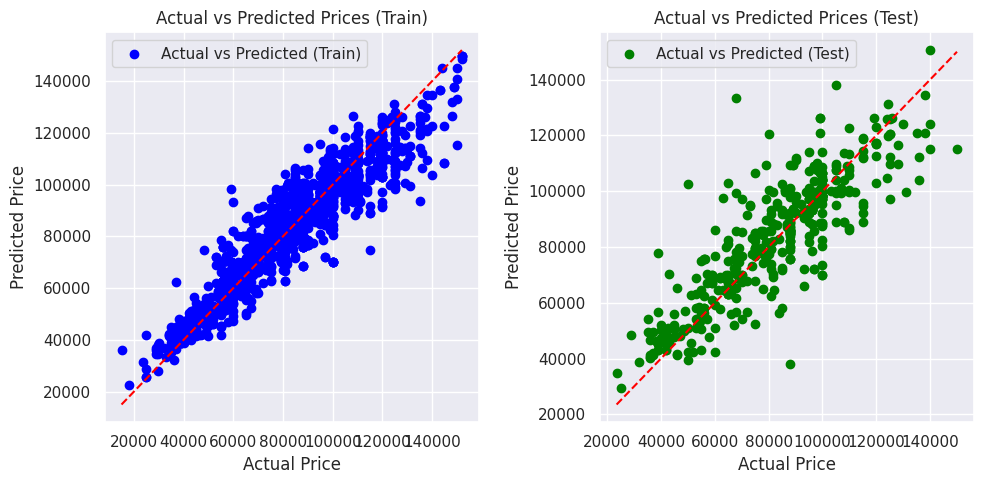



Model: LinearRegression
Best Parameters:
fit_intercept: True
Best Score (RMSE): 14400.4584015354
Train RMSE: 14308.854676248808
Test RMSE: 14056.739844530633
Train MAE: 11393.907955566623
Test MAE: 11471.857749198232
Train R^2: 0.6531309997016209
Test R^2: 0.6526658007936668


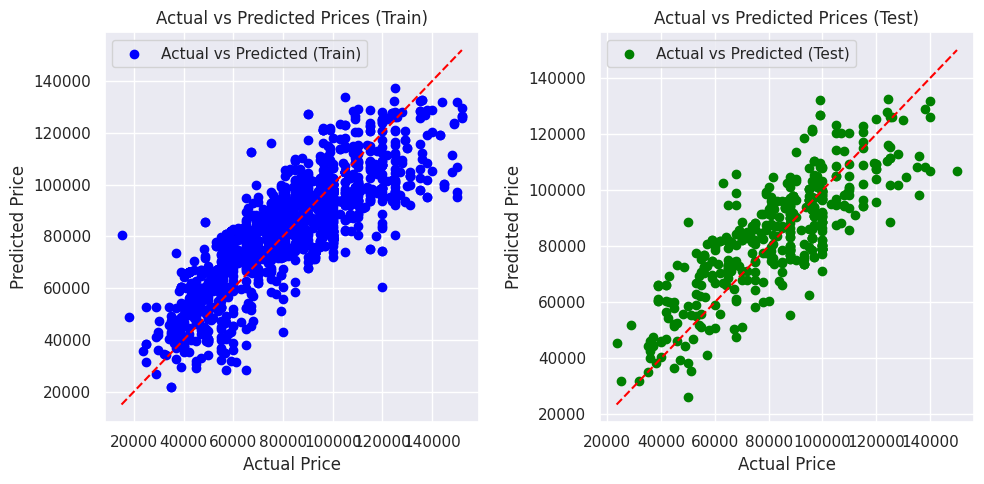



Model: SVR
Best Parameters:
C: 10
epsilon: 0.01
kernel: linear
Best Score (RMSE): 17910.329443043505
Train RMSE: 17141.80489642565
Test RMSE: 16663.63074199517
Train MAE: 13906.08330023628
Test MAE: 13560.36524185397
Train R^2: 0.5021840143634881
Test R^2: 0.5118901192676227


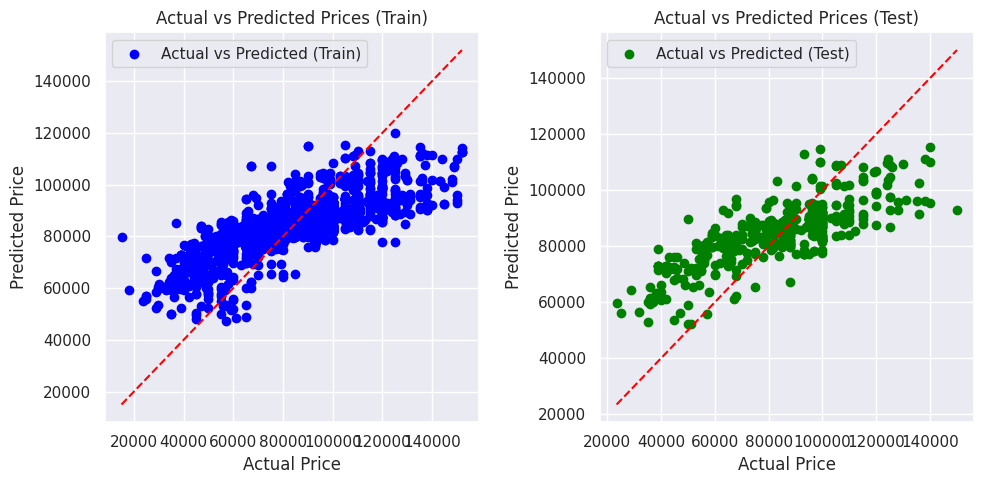

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Step 1: Split the Data into Training and Testing Sets
X = df10.copy()
y = df6['Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 6, 7]
}

param_grid_lr = {
    'fit_intercept': [True, False]
}

param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize models
models = {
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), param_grid_rf),
    'GradientBoostingRegressor': (GradientBoostingRegressor(random_state=42), param_grid_gb),
    'LinearRegression': (LinearRegression(), param_grid_lr),
    'SVR': (SVR(), param_grid_svr)
}

best_model = None
best_score = float('inf')
best_model_name = ''

# Iterate over models
for model_name, (model, param_grid) in models.items():
    print("Model:", model_name)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = -grid_search.best_score_
    print("Best Parameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    print("Best Score (RMSE):", best_score)

    # Predict on train and test sets
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)

    # Calculate additional evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print("Train RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)
    print("Train MAE:", train_mae)
    print("Test MAE:", test_mae)
    print("Train R^2:", train_r2)
    print("Test R^2:", test_r2)

    # Visualize predictions vs actual prices
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Train)')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices (Train)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted (Test)')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices (Test)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Save the best model
    if best_score < best_score:
        best_score = best_score
        best_model = grid_search.best_estimator_
        best_model_name = model_name

    print("\n")


Testing Pipeline and model

In [35]:
# Prepare the input data as a DataFrame to test preprocessing pipeline
input_data = pd.DataFrame({
    'area': [150],
    'age': ['0 - 1'],
    'floor': ['Third Floor'],
    'number of rooms': [3],
    'number of bathrooms': [3]
})

# Apply the preprocessing pipeline to the input data
processed_data = pipeline.transform(input_data)

# Define the list of age categories
age_categories = ['0 - 1', '1 - 5', '6 - 9', '10 - 19', '20 - 40']

# Create new column names for the encoded features
age_columns = ['age_' + category.replace(' ', '_') for category in age_categories]

# Convert the NumPy array to a DataFrame
df_pro = pd.DataFrame(processed_data, columns=['area_scaled'] + age_columns + ['floor_numeric', 'total_rooms'])
df_pro

,area_scaled,age_0_-_1,age_1_-_5,age_6_-_9,age_10_-_19,age_20_-_40,floor_numeric,total_rooms
0,-0.138709,1.0,0.0,0.0,0.0,0.0,3.0,6.0


In [36]:

#Split the Data into Training and Testing Sets
X = df10.copy()
y = df6['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train the model
best_model = RandomForestRegressor(
                                          max_depth=10,
                                          min_samples_leaf=1,
                                          min_samples_split=5,
                                          n_estimators=200)


best_model.fit(X_train, y_train)
best_model.predict(df_pro)

# Save the model to a file
#joblib.dump(best_model, 'best_model.pkl')


array([96575.64748738])